 # Text Representation: TF-IDF

TF stands for **Term Frequency** and denotes the ratio of number of times a particular word appeared in a Document to total number of words in the document.

$
   Term Frequency(TF) = \frac{No Of Times Word Appeared } {Total No Of Words In A  Document }
$

Term Frequency values ranges between 0 and 1. If a word occurs more number of times, then it's value will be close to 1.

IDF stands for **Inverse Document Frequency** and denotes the log of ratio of total number of documents/datapoints in the whole dataset to the number of documents that contains the particular word.

   $ 
   Inverse Document Frequency(IDF) = \log\frac{ Total No Of Documents} {No of Documents That Contains The Word}
   $

In IDF, if a word occured in more number of documents and is common across all documents, then it's value will be less and ratio will approaches to 0.

Finally:

   $ TF-IDF = Term Frequency(TF) * Inverse Document Frequency(IDF) $

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes",
    "something is amazing"
]

In [5]:
v = TfidfVectorizer()

transformed_output = v.fit_transform(corpus)

In [7]:
dir(v)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_feature_names',
 '_check_n_features',
 '_check_params',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_get_param_names',
 '_get_tags',
 '_limit_features',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sort_features',
 '_stop_words_id',
 '_tfidf',
 '_validate_data',
 '_validate_params',
 '_validate_vocabulary',
 '_warn_for_unused_params',
 '_white_spaces',
 '_word_ngrams',
 'analyzer',
 'binary',
 'build_analyzer',
 'build_preprocessor',
 'build_tokenizer',
 'decode',
 'decode_error',
 

# IDF score

In [8]:
v.get_feature_names_out()

array(['already', 'am', 'amazon', 'and', 'announcing', 'apple', 'are',
       'ate', 'biryani', 'dot', 'eating', 'eco', 'google', 'grapes',
       'iphone', 'ironman', 'is', 'loki', 'microsoft', 'model', 'new',
       'pixel', 'pizza', 'surface', 'tesla', 'thor', 'tomorrow', 'you'],
      dtype=object)

In [9]:
print(v.vocabulary_)

{'thor': 25, 'eating': 10, 'pizza': 22, 'loki': 17, 'is': 16, 'ironman': 15, 'ate': 7, 'already': 0, 'apple': 5, 'announcing': 4, 'new': 20, 'iphone': 14, 'tomorrow': 26, 'tesla': 24, 'model': 19, 'google': 12, 'pixel': 21, 'microsoft': 18, 'surface': 23, 'amazon': 2, 'eco': 11, 'dot': 9, 'am': 1, 'biryani': 8, 'and': 3, 'you': 27, 'are': 6, 'grapes': 13}


In [12]:
index = v.vocabulary_.get('iphone')
print(index)

14


In [13]:
v.idf_[14]

2.386294361119891

# IDF score for dataset

In [16]:
all_feature_names = v.get_feature_names_out()

for word in all_feature_names:
    idx = v.vocabulary_.get(word)
    print(f"{word} {v.idf_[idx]}")

already 2.386294361119891
am 2.386294361119891
amazon 2.386294361119891
and 2.386294361119891
announcing 1.2876820724517808
apple 2.386294361119891
are 2.386294361119891
ate 2.386294361119891
biryani 2.386294361119891
dot 2.386294361119891
eating 1.9808292530117262
eco 2.386294361119891
google 2.386294361119891
grapes 2.386294361119891
iphone 2.386294361119891
ironman 2.386294361119891
is 1.1335313926245225
loki 2.386294361119891
microsoft 2.386294361119891
model 2.386294361119891
new 1.2876820724517808
pixel 2.386294361119891
pizza 2.386294361119891
surface 2.386294361119891
tesla 2.386294361119891
thor 2.386294361119891
tomorrow 1.2876820724517808
you 2.386294361119891


In [17]:
corpus[:2]

['Thor eating pizza, Loki is eating pizza, Ironman ate pizza already',
 'Apple is announcing new iphone tomorrow']

In [19]:
transformed_output.toarray()[:2]

array([[0.24266547, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.24266547, 0.        , 0.        ,
        0.40286636, 0.        , 0.        , 0.        , 0.        ,
        0.24266547, 0.11527033, 0.24266547, 0.        , 0.        ,
        0.        , 0.        , 0.72799642, 0.        , 0.        ,
        0.24266547, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.30652086,
        0.5680354 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.5680354 ,
        0.        , 0.26982671, 0.        , 0.        , 0.        ,
        0.30652086, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.30652086, 0.        ]])

# Ecommerce TEXT Classification Model

**Problem Statement:** Given a description about a product sold on e-commerce website, classify it in one of the 4 categories

Dataset Credits: https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification

- **Text**: Description of an item sold on e-commerce website
- **Label**: Category of that item. Total 4 categories: "Electronics", "Household", "Books" and "Clothing & Accessories", which almost cover 80% of any E-commerce website.


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy

#read the data into a pandas dataframe
df = pd.read_csv("dataset/ecommerceDataset.csv", header=None, names=['label','text'])

In [96]:
df.head()

,label,text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [97]:
print(df.shape)

(50425, 2)


In [105]:
df.label.value_counts()

Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8670
Name: label, dtype: int64

In [99]:
df.isnull().sum()

label    0
text     1
dtype: int64

In [100]:
df[df['text'].isnull()]

,label,text
39330,Clothing & Accessories,NaN


In [101]:
df = df.dropna()

In [102]:
df.shape

(50424, 2)

In [103]:
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    """
    remove stop words and punctuations
    Return : sentence with base words from LEMMA_
    """
    doc = nlp(text)
    filtered_tokens = []
    
    for token in doc:
        if not token.is_stop and not token.is_punct:
            filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens)

In [106]:
### use undersampling  for this excercise:

min_samples = 8670

df_Household= df[df.label=="Household"].sample(min_samples, random_state=42)
df_Books= df[df.label=="Books"].sample(min_samples, random_state=42)
df_Electronics= df[df.label=="Electronics"].sample(min_samples, random_state=42)
df_Clothing_Accessories= df[df.label=="Clothing & Accessories"].sample(min_samples, random_state=42)

In [107]:
df_balanced = pd.concat([df_Household,df_Books,df_Electronics,df_Clothing_Accessories], axis=0)
df_balanced.label.value_counts()

Household                 8670
Books                     8670
Electronics               8670
Clothing & Accessories    8670
Name: label, dtype: int64

In [108]:
df_balanced["label_num"] = df_balanced.label.map(
    {"Household":0, 
     "Books":1,
     "Electronics":2, 
     "Clothing & Accessories":3}
)

In [109]:
df_balanced.head()

,label,text,label_num
12340,Household,"Riedel VINUM Cognac Glasses, Set of 2 Size:Set...",0
7144,Household,ANSIO Polyester Shower Curtain for Bathroom - ...,0
4400,Household,Little India Meenakari Work Lord Ganesh Marble...,0
9992,Household,PETRICE Triple Paper Dispenser | 4 in 1 Foil C...,0
16601,Household,KC Cab Copper PVC Insulated Wire 90 m Coil(Red...,0


In [110]:
### Build bag of words model 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = df_balanced["text"]
y =df_balanced["label_num"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [111]:
print("shape of X_train: ",X_train.shape)
print("shape of X_test: ",X_test.shape)

shape of X_train:  (27744,)
shape of X_test:  (6936,)


In [112]:
X_test.isnull().sum()

0

In [113]:
y_test.value_counts()

3    1734
1    1734
2    1734
0    1734
Name: label_num, dtype: int64

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1734
           1       0.96      0.95      0.96      1734
           2       0.95      0.96      0.95      1734
           3       0.97      0.97      0.97      1734

    accuracy                           0.96      6936
   macro avg       0.96      0.96      0.96      6936
weighted avg       0.96      0.96      0.96      6936

training score.... 0.9691104382929643
test score.... 0.9567474048442907


C:\Users\sd991188\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


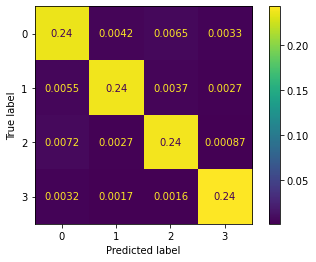

In [114]:
clf = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('KNN', KNeighborsClassifier())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred,))
print('training score....', accuracy_score(y_train, clf.predict(X_train)))
print('test score....', accuracy_score(y_test, y_pred))

plot_confusion_matrix(clf, X_test, y_test,normalize='all') 
plt.show()

Text(69.0, 0.5, 'actual')

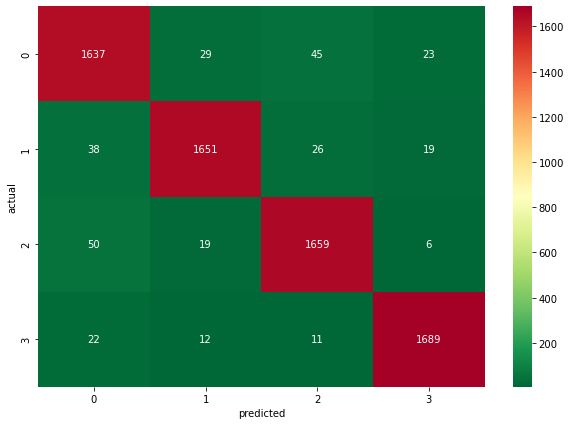

In [118]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.RdYlGn_r)
plt.xlabel('predicted')
plt.ylabel('actual')

In [119]:
### Manual Verfication for first 5 sample
X_test[:5]

38374    Puma Women's Regular fit Sports T-Shirt Flaunt...
38307    Simon Women's & Girls (3 Pairs Pack) Skin Colo...
36021    Applecreation Women's Silk Dress Material (300...
38335    Jockey Women's Cotton Slip On Active Bra Premi...
20600                Physical Geography Physical Geography
Name: text, dtype: object

In [120]:
y_test[:5]

38374    3
38307    3
36021    3
38335    3
20600    1
Name: label_num, dtype: int64

In [121]:
y_pred[:5]

array([3, 3, 3, 3, 1], dtype=int64)

# Apply PREPROPCESS and re-train

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy

#read the data into a pandas dataframe
df = pd.read_csv("dataset/ecommerceDataset.csv", header=None, names=['label','text'])

In [2]:
df.head()

,label,text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [3]:
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    """
    remove stop words and punctuations
    Return : sentence with base words from LEMMA_
    """
    doc = nlp(text)
    filtered_tokens = []
    
    for token in doc:
        if not token.is_stop and not token.is_punct:
            filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens)

In [4]:
df.describe()

,label,text
count,50425,50424
unique,4,27802
top,Household,Think & Grow Rich About the Author NAPOLEON HI...
freq,19313,30


In [5]:
df.isnull().sum()

label    0
text     1
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [8]:
df.label.value_counts()

Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8670
Name: label, dtype: int64

In [9]:
### use undersampling  for this excercise:

min_samples = 8670

df_Household= df[df.label=="Household"].sample(min_samples, random_state=42)
df_Books= df[df.label=="Books"].sample(min_samples, random_state=42)
df_Electronics= df[df.label=="Electronics"].sample(min_samples, random_state=42)
df_Clothing_Accessories= df[df.label=="Clothing & Accessories"].sample(min_samples, random_state=42)

In [10]:
df_balanced = pd.concat([df_Household,df_Books,df_Electronics,df_Clothing_Accessories], axis=0)
df_balanced.label.value_counts()

Household                 8670
Books                     8670
Electronics               8670
Clothing & Accessories    8670
Name: label, dtype: int64

In [11]:
df_balanced['preprocessed_text']=df_balanced.text.map(preprocess)

In [12]:
df_balanced.head()

,label,text,preprocessed_text
12340,Household,"Riedel VINUM Cognac Glasses, Set of 2 Size:Set...",Riedel vinum Cognac Glasses Set 2 size Set 2 ...
7144,Household,ANSIO Polyester Shower Curtain for Bathroom - ...,ANSIO Polyester Shower Curtain Bathroom Solid ...
4400,Household,Little India Meenakari Work Lord Ganesh Marble...,little India Meenakari Work Lord Ganesh Marble...
9992,Household,PETRICE Triple Paper Dispenser | 4 in 1 Foil C...,PETRICE Triple Paper Dispenser | 4 1 Foil Clin...
16601,Household,KC Cab Copper PVC Insulated Wire 90 m Coil(Red...,KC Cab Copper PVC Insulated Wire 90 m Coil(Red...


In [13]:
df_balanced["label_num"] = df_balanced.label.map(
    {"Household":0, 
     "Books":1,
     "Electronics":2, 
     "Clothing & Accessories":3}
)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1734
           1       0.95      0.96      0.96      1734
           2       0.96      0.95      0.95      1734
           3       0.99      0.97      0.98      1734

    accuracy                           0.96      6936
   macro avg       0.96      0.96      0.96      6936
weighted avg       0.96      0.96      0.96      6936

training score.... 0.9726066897347174
test score.... 0.9576124567474048


Text(69.0, 0.5, 'actual')

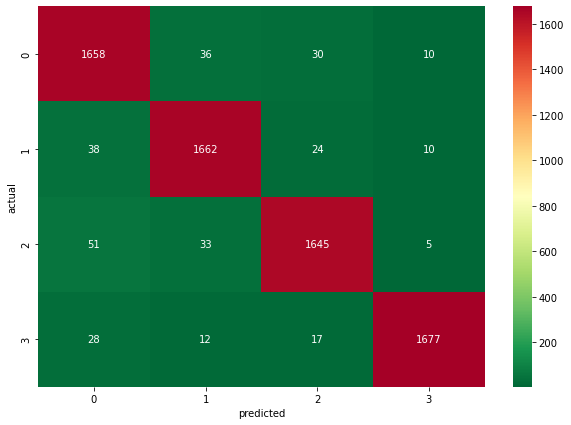

In [14]:
### Build bag of words model 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = df_balanced["preprocessed_text"]  ### Preprocessed data for training
y =df_balanced["label_num"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

clf = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('KNN', KNeighborsClassifier())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred,))
print('training score....', accuracy_score(y_train, clf.predict(X_train)))
print('test score....', accuracy_score(y_test, y_pred))


### verify confusion matrix an dplot the heatmap
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.RdYlGn_r)
plt.xlabel('predicted')
plt.ylabel('actual')

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1734
           1       0.97      0.93      0.95      1734
           2       0.95      0.95      0.95      1734
           3       0.97      0.98      0.98      1734

    accuracy                           0.95      6936
   macro avg       0.95      0.95      0.95      6936
weighted avg       0.95      0.95      0.95      6936

training score.... 0.9591623414071511
test score.... 0.9540080738177624


Text(69.0, 0.5, 'actual')

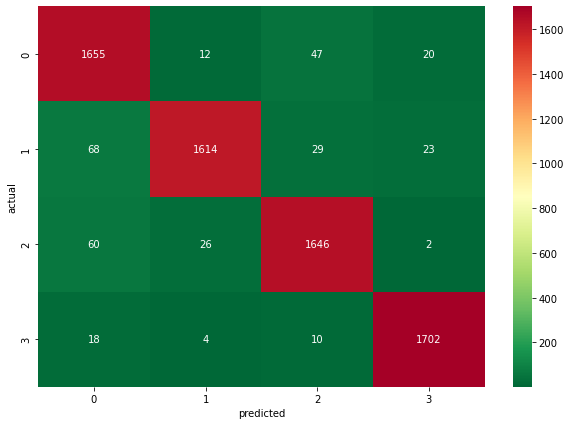

In [15]:
### Build bag of words model 

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = df_balanced["preprocessed_text"] ### Preprocessed data for training
y =df_balanced["label_num"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

clf = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('Multinomial NB', MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred,))
print('training score....', accuracy_score(y_train, clf.predict(X_train)))
print('test score....', accuracy_score(y_test, y_pred))


### verify confusion matrix an dplot the heatmap
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.RdYlGn_r)
plt.xlabel('predicted')
plt.ylabel('actual')

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1734
           1       0.98      0.97      0.97      1734
           2       0.97      0.96      0.97      1734
           3       0.98      0.99      0.98      1734

    accuracy                           0.97      6936
   macro avg       0.97      0.97      0.97      6936
weighted avg       0.97      0.97      0.97      6936

training score.... 1.0
test score.... 0.9695790080738178


Text(69.0, 0.5, 'actual')

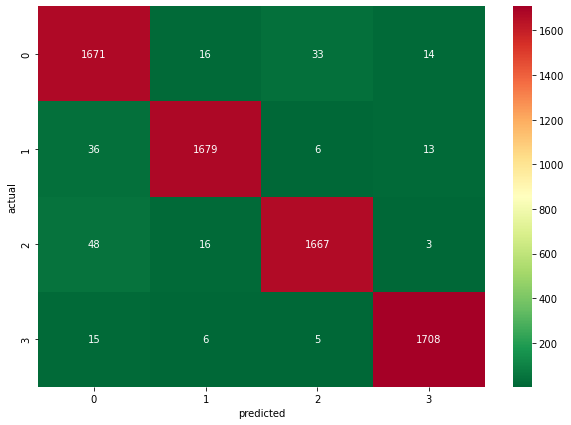

In [16]:
### Build bag of words model 

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = df_balanced["preprocessed_text"] ### Preprocessed data for training
y =df_balanced["label_num"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

clf = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('RFC', RandomForestClassifier())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred,))
print('training score....', accuracy_score(y_train, clf.predict(X_train)))
print('test score....', accuracy_score(y_test, y_pred))


### verify confusion matrix an dplot the heatmap
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.RdYlGn_r)
plt.xlabel('predicted')
plt.ylabel('actual')